# <center>MICAS913 - Deep Learning </center>#
# <center> End-to-end Deep Learning of a Communication System </center>#
#  NAMES: Hanin Hamdi #
#  NAMES: PANONGBENE JEAN MOHAMED SAWADOGO #
###  Email: hanin.hamdi@telecom-paris.fr #
### Email: amet1900@gmail.com #
### Github: https://github.com/Panongbene #

In [9]:
import numpy as np
import matplotlib.pyplot as plt



## Variables 

In [8]:
# variables
L = pow(10,6)                                       # distance
B = pow(10,10)                                      # bandwidth

# physical constants
a_dB = 2*pow(10,-4)                                 # power loss in dB
D = 17*pow(10,-6)                                   # dispersion ps/(nm-km)
gama = 1.27*pow(10,-3)                              # nonlinearity coefficient
nsp = 1                                             # a constant factor
h = 6.626*pow(10,-34)                               # Planck constant
lambda0 = 1.55*pow(10,-6)                           # center wavelength
f0 = 3*pow(10,8)/lambda0                            # center frequency


alpha = pow(10,-7)*np.log2(10)*0.2                  # loss coefficient
beta2 = -(pow(lambda0,2)*D)/(2*3.14*3*pow(10,8))    # dispersion coefficient


# scale factors
L0 = L                                              #
T0 = np.sqrt((-beta2*L)/2)                          #
P0 = 2/(gama*L)                                     #

# noise PSD
sigma02 = nsp*h*alpha*f0                            # physical
sigma2 = (sigma02*L)/(P0*T0)                        # normalized

## Plot Constellation

In [41]:
print("Normalize Peak Power = ", P0/(6*pow(10,-3)))

Normalize Peak Power =  0.26246719160104987


In [32]:
# Mapping Table
mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}

X = np.arange(-4,5,1)
X1 = X*0

Y1 = np.arange(-4,5,1)
Y = Y1*0

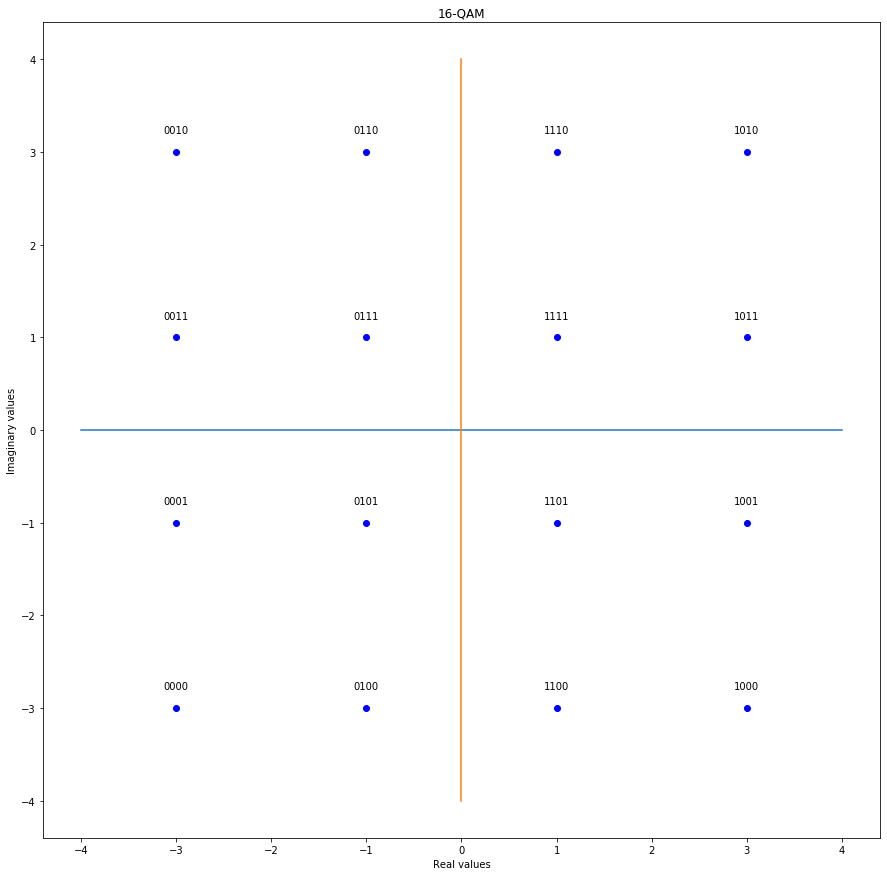

In [36]:
plt.figure(figsize=(15,15))

for i in [0, 1]:
    for j in [0, 1]:
        for k in [0, 1]:
            for l in [0, 1]:
                B = (i, j, k, l)
                Q = mapping_table[B]
                plt.plot(Q.real, Q.imag, 'bo')
                plt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')

plt.plot(X,X1)
plt.plot(Y,Y1)

plt.title("16-QAM")
plt.xlabel('Real values')
plt.ylabel('Imaginary values')

plt.savefig('constellation.png')
plt.show()

## Generate Binary Source

In [45]:
def source(N, p):
    """This function Generate the binary source"""
    
    return np.random.binomial(1, p, N)
        

In [90]:
len(source(1024, 1/2))

1024

## Bits To Symbols Mapping

In [58]:
def symbols_binariry_sequence(M):
    """This function map M symbols point to a binary sequence length log2(M)"""
    
    mapping_M = dict()
    
    for i in range(M):
        tamp = bin(i)[2:]
        lenght_tamp = int(np.log2(M))-len(tamp)
        for j in range(lenght_tamp+1):
            tamp='0'+tamp
        mapping_M[i] = tamp
        
    return mapping_M

In [89]:
symbols_binariry_sequence(8)

{0: '0000',
 1: '0001',
 2: '0010',
 3: '0011',
 4: '0100',
 5: '0101',
 6: '0110',
 7: '0111'}

In [64]:
def ham_dist(chaine1, chaine2):
    """This function compute the hamming distance"""
    
    return sum(c1!=c2 for c1, c2 in zip(chaine1, chaine2))  

In [234]:
def symbol_binariry_sequence_gray(M):
    """This function map M symbols to a binary sequence length log2(M) such that menimizing the hamming distance..."""
    
    tamp_mapping = symbols_binariry_sequence(M)
    
    mapping_M_gray = dict()
    
    mapping_M_gray[0] = tamp_mapping[0]
    
    del tamp_mapping[0]
    
    for i in range(1, M):
        k = 1
        for j in tamp_mapping:
            if(ham_dist(mapping_M_gray[i-1], tamp_mapping[j]) == 1):
                    #print(i, "  ", j)
                    mapping_M_gray[i] = tamp_mapping[j]
                    del tamp_mapping[j] 
                    break
            k += 1
        
            if(k == len(tamp_mapping)):
                return mapping_M_gray
                    
                    
    return mapping_M_gray

In [88]:
symbol_binariry_sequence_gray(8)

{0: '0000',
 1: '0001',
 2: '0011',
 3: '0010',
 4: '0110',
 5: '0100',
 6: '0101',
 7: '0111'}

In [326]:
def bit_to_symb(B, cnt):
    """This function """

    M = len(cnt)
    M_log = int(np.log2(M))
    n = int(len(B)/M_log)
    
    sub_sequence = dict()

    for i in range(n):
        tamp = ""
        for j in range(M_log):
            tamp = tamp +str(B[i*M_log+j])
        sub_sequence[i] = '0'+tamp
        
    
    tamp_n = M//4
    tamp_n =  int(np.sqrt(tamp_n))
    X = [i+1 for i in range(tamp_n)]
    Y = [i+1 for i in range(tamp_n)]
    
    
    # Mapping
    S_tamp = dict()
    S_tamp_1 = dict()
    S = dict()
    print(n)
    m_X = -tamp_n-1
    m_Y = tamp_n-1
    X_ = [-tamp_n]
    Y_ = [tamp_n]
    print(tamp_n)
    for i in range(2*tamp_n):
        if(m_X==0):
            m_X = m_X+1
            m_Y = m_Y-1
            continue

        X_.append(m_X)
        Y_.append(m_Y)
        m_Y-=1
        m_X+=1
        
        
    k = 0
    for i in Y_:
        for j in X_:
            S_tamp[k] = j+i*1j
            k+=1
    
    for i in range(M):
        S_tamp_1[cnt[i]] = S_tamp[i]
    
    print(S_tamp_1)
    print(sub_sequence)
    
    for i in sub_sequence:

        S[sub_sequence[i]] = S_tamp_1[sub_sequence[i]]
        print( S[sub_sequence[i]])
    return S

In [327]:
B = source(1024, 1/2)
M = symbols_binariry_sequence(64)
bit_to_symb(B, M)

170
4
{'0000000': (-4+4j), '0000001': (-5+4j), '0000010': (-4+4j), '0000011': (-3+4j), '0000100': (-2+4j), '0000101': (-1+4j), '0000110': (1+4j), '0000111': (2+4j), '0001000': (-4+3j), '0001001': (-5+3j), '0001010': (-4+3j), '0001011': (-3+3j), '0001100': (-2+3j), '0001101': (-1+3j), '0001110': (1+3j), '0001111': (2+3j), '0010000': (-4+2j), '0010001': (-5+2j), '0010010': (-4+2j), '0010011': (-3+2j), '0010100': (-2+2j), '0010101': (-1+2j), '0010110': (1+2j), '0010111': (2+2j), '0011000': (-4+1j), '0011001': (-5+1j), '0011010': (-4+1j), '0011011': (-3+1j), '0011100': (-2+1j), '0011101': (-1+1j), '0011110': (1+1j), '0011111': (2+1j), '0100000': (-4+0j), '0100001': (-5+0j), '0100010': (-4+0j), '0100011': (-3+0j), '0100100': (-2+0j), '0100101': (-1+0j), '0100110': (1+0j), '0100111': (2+0j), '0101000': (-4-1j), '0101001': (-5-1j), '0101010': (-4-1j), '0101011': (-3-1j), '0101100': (-2-1j), '0101101': (-1-1j), '0101110': (1-1j), '0101111': (2-1j), '0110000': (-4-3j), '0110001': (-5-3j), '0110

{'0111001': (-5-4j),
 '0111011': (-3-4j),
 '0000000': (-4+4j),
 '0100011': (-3+0j),
 '0001111': (2+3j),
 '0111110': (1-4j),
 '0011111': (2+1j),
 '0001101': (-1+3j),
 '0101001': (-5-1j),
 '0010011': (-3+2j),
 '0110111': (2-3j),
 '0000110': (1+4j),
 '0101101': (-1-1j),
 '0010000': (-4+2j),
 '0010100': (-2+2j),
 '0100100': (-2+0j),
 '0010101': (-1+2j),
 '0000111': (2+4j),
 '0111101': (-1-4j),
 '0000001': (-5+4j),
 '0110011': (-3-3j),
 '0010001': (-5+2j),
 '0110010': (-4-3j),
 '0110101': (-1-3j),
 '0001110': (1+3j),
 '0101100': (-2-1j),
 '0001010': (-4+3j),
 '0110001': (-5-3j),
 '0110100': (-2-3j),
 '0101000': (-4-1j),
 '0001001': (-5+3j),
 '0011011': (-3+1j),
 '0110000': (-4-3j),
 '0101111': (2-1j),
 '0100111': (2+0j),
 '0011000': (-4+1j),
 '0111111': (2-4j),
 '0010111': (2+2j),
 '0000101': (-1+4j),
 '0101110': (1-1j),
 '0001000': (-4+3j),
 '0011101': (-1+1j),
 '0100000': (-4+0j),
 '0001011': (-3+3j),
 '0111000': (-4-4j),
 '0110110': (1-3j),
 '0010010': (-4+2j),
 '0000011': (-3+4j),
 '010

In [292]:
sub_sequence

{0: '011',
 1: '110',
 2: '110',
 3: '110',
 4: '010',
 5: '010',
 6: '111',
 7: '010',
 8: '111',
 9: '101',
 10: '100',
 11: '001',
 12: '011',
 13: '110',
 14: '001',
 15: '101',
 16: '100',
 17: '100',
 18: '100',
 19: '110',
 20: '000',
 21: '001',
 22: '000',
 23: '000',
 24: '111',
 25: '011',
 26: '111',
 27: '011',
 28: '001',
 29: '001',
 30: '001',
 31: '010',
 32: '100',
 33: '111',
 34: '011',
 35: '000',
 36: '111',
 37: '110',
 38: '111',
 39: '101',
 40: '010',
 41: '010',
 42: '101',
 43: '101',
 44: '110',
 45: '100',
 46: '100',
 47: '001',
 48: '101',
 49: '011',
 50: '001',
 51: '010',
 52: '101',
 53: '000',
 54: '000',
 55: '100',
 56: '111',
 57: '001',
 58: '000',
 59: '111',
 60: '011',
 61: '101',
 62: '010',
 63: '111',
 64: '001',
 65: '010',
 66: '011',
 67: '111',
 68: '110',
 69: '101',
 70: '011',
 71: '011',
 72: '000',
 73: '111',
 74: '110',
 75: '100',
 76: '001',
 77: '111',
 78: '000',
 79: '111',
 80: '000',
 81: '001',
 82: '011',
 83: '111',
 8

In [293]:
len(B)

1024